In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading dataset to python

In [3]:
data=pd.read_csv("titanic_dataset.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#set passenger id as index column

In [6]:
data=pd.read_csv("titanic_dataset.csv",index_col="PassengerId")

In [7]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Datapreprocessing

In [8]:
#shape of data

In [9]:
data.shape

(891, 11)

In [10]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [11]:
#Checking for null values

In [12]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
#checking for unique values

In [14]:
data["Age"].nunique()

88

In [15]:
data["Age"].median()

28.0

In [16]:
data["Cabin"].nunique()

147

In [17]:
#checking mode in cabin column

In [18]:
data["Cabin"].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [19]:
data["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [20]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
#filling missing values

In [22]:
data["Embarked"]=data["Embarked"].fillna(data["Embarked"].mode()[0])

In [23]:
data["Age"]=data["Age"].fillna(data["Age"].median())

In [24]:
#drop cabin column

In [25]:
data.drop("Cabin",axis=1,inplace=True)

In [26]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [27]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [28]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [29]:
#drop name column from the data

In [30]:
data["Name"].nunique()

891

In [31]:
data.drop("Name",axis=1,inplace=True)

In [32]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.0,1,0,113803,53.1000,S
5,0,3,male,35.0,0,0,373450,8.0500,S


In [33]:
#checking for unique values in ticket column and dropping ticket column

In [34]:
data["Ticket"].nunique()

681

In [35]:
data.drop("Ticket",axis=1,inplace=True)

In [36]:
data.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.25,S


In [37]:
data["Embarked"].nunique()

3

In [38]:
data["Sex"].nunique()

2

In [39]:
data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [40]:
#count plot of survived column

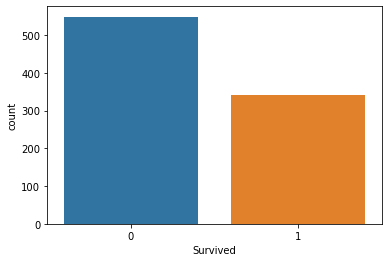

In [41]:
sns.countplot(x=data["Survived"])
plt.show()

In [42]:
#performing One-hot Encoding on the dataset

In [43]:
data=pd.get_dummies(data)

In [44]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [45]:
data["Sex_female"].value_counts()

0    577
1    314
Name: Sex_female, dtype: int64

In [46]:
#pairplot between survived male and female columns

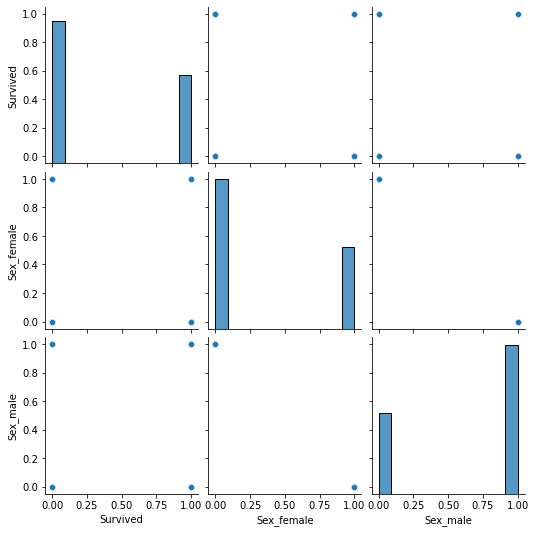

In [47]:
num_data=data[["Survived","Sex_female","Sex_male"]]
sns.pairplot(num_data)


In [48]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [49]:
#splitting into features and target

In [50]:
X=data.drop("Survived",axis=1)
y=data["Survived"]

In [51]:
#Train-test split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

KNearestneighborsClassifier Model

In [54]:
#import knearest classifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [57]:
#steps to find k-value

In [58]:
metric_k=[]
neighbors=range(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,y_train)
    y_pred_KNN=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_KNN)
    metric_k.append(acc)

In [59]:
metric_k

[0.7130044843049327,
 0.6860986547085202,
 0.7040358744394619,
 0.7174887892376681,
 0.7174887892376681,
 0.7130044843049327,
 0.7085201793721974,
 0.7130044843049327,
 0.6995515695067265,
 0.6995515695067265,
 0.6905829596412556,
 0.6995515695067265]

In [60]:
#plotting accuracy

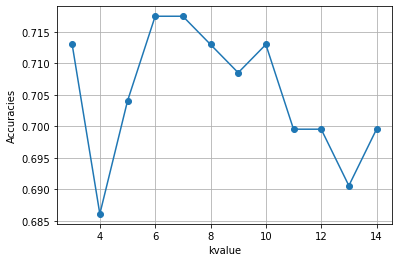

In [61]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('kvalue')
plt.ylabel('Accuracies')
plt.grid()

In [62]:
classifier=KNeighborsClassifier(n_neighbors=5)
classifier=classifier.fit(X_train,y_train)
y_pred_KNN=classifier.predict(X_test)

In [63]:
y_pred_KNN

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [64]:
#confusion matrix

In [65]:
confusion_matrix(y_test,y_pred_KNN)

array([[106,  28],
       [ 38,  51]], dtype=int64)

In [66]:
#accuracy_score

In [67]:
accuracy_score(y_test,y_pred_KNN)

0.7040358744394619

In [68]:
#import precision_score and recall_score

In [69]:
from sklearn.metrics import precision_score,recall_score

In [70]:
precision_score(y_test,y_pred_KNN)

0.6455696202531646

In [71]:
recall_score(y_test,y_pred_KNN)

0.5730337078651685

In [72]:
#check for Score in this model

In [73]:
score_KNN=classifier.score(X_test,y_test)

In [74]:
score_KNN

0.7040358744394619

KFold Cross validation in Knearest neighbors model

In [75]:
#import k-fold

In [76]:
from sklearn.model_selection import KFold

In [77]:
KFold_validator=KFold(10)

In [78]:
#checking for  which all indexes are taken for training and validation in each iteration.

In [79]:
for train_index,test_index in KFold_validator.split(X,y):
    print("Training index:",train_index)
    print("Test index:",test_index)

Training index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [80]:
#Cross-validation

In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
cv_result=cross_val_score(classifier,X,y,cv=KFold_validator)

In [83]:
cv_result

array([0.64444444, 0.73033708, 0.71910112, 0.69662921, 0.71910112,
       0.73033708, 0.73033708, 0.73033708, 0.69662921, 0.80898876])

In [84]:
np.mean(cv_result)

0.7206242197253434

Stratified KFold Cross validation in Knearest neighbors model

In [85]:
from sklearn.model_selection import StratifiedKFold

In [86]:
skfold_validator=StratifiedKFold(n_splits=10)

In [87]:
for train_index,test_index in skfold_validator.split(X,y):
    print("Training index:",train_index)
    print("Test index:",test_index)

Training index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [88]:
#cross validation

In [89]:
skvc_result=cross_val_score(classifier,X,y,cv=skfold_validator)

In [90]:
skvc_result

array([0.64444444, 0.71910112, 0.68539326, 0.73033708, 0.74157303,
       0.71910112, 0.75280899, 0.73033708, 0.66292135, 0.79775281])

In [91]:
np.mean(skvc_result)

0.7183770287141074

SVM -Model

In [92]:
#import svm 

In [93]:
from sklearn.svm import SVC

In [94]:
svm_clf=SVC(kernel='rbf')
svm_clf=svm_clf.fit(X_train,y_train)
y_pred_svm=svm_clf.predict(X_test)

In [95]:
y_pred_svm

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [96]:
#checking confusion matrix,precision,recall and accuracy scores

In [97]:
accuracy_score(y_test,y_pred_svm)

0.6636771300448431

In [98]:
confusion_matrix(y_test,y_pred_svm)

array([[125,   9],
       [ 66,  23]], dtype=int64)

In [99]:
precision_score(y_test,y_pred_svm)

0.71875

In [100]:
recall_score(y_test,y_pred_svm)

0.25842696629213485

In [101]:
#checking for score value in svm

In [102]:
score_svm=svm_clf.score(X_test,y_test)

In [103]:
score_svm

0.6636771300448431

k-Fold validation in SVM

In [104]:
kfold_validator=KFold(10)

In [105]:
#checking which all indexes are taken for training and cross validation in each iteration.

In [106]:
for train_index,test_index in kfold_validator.split(X,y):
    print("Training index:",train_index)
    print("Test index:",test_index)

Training index: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [107]:
#Cross-validation

In [108]:
cv_result=cross_val_score(svm_clf,X,y,cv=kfold_validator)

In [109]:
cv_result

array([0.6       , 0.6741573 , 0.66292135, 0.6741573 , 0.66292135,
       0.71910112, 0.65168539, 0.74157303, 0.73033708, 0.69662921])

In [110]:
np.mean(cv_result)

0.6813483146067416

Stratified-Cross Validation in SVM

In [111]:
skfold_validator=StratifiedKFold(n_splits=10)

In [112]:
#Checking which all indexes are taken for training and validation in each iteration.

In [113]:
for train_index, test_index in skfold_validator.split(X,y):
    print("Training index:",train_index)
    print("Test index:",test_index)

Training index: [ 82  84  85  88  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305
 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323
 324 325 326 327 328 329 330 331 33

In [114]:
# Stratified-Cross Validation

In [115]:
skvc_result=cross_val_score(svm_clf,X,y,cv=skfold_validator)

In [116]:
skvc_result

array([0.62222222, 0.58426966, 0.68539326, 0.74157303, 0.69662921,
       0.69662921, 0.68539326, 0.71910112, 0.70786517, 0.6741573 ])

In [117]:
np.mean(skvc_result)

0.6813233458177278

In [ ]:
"""

For K-Nearest Neighbors model the average value after K-Fold cross validation is 0.7206242197253434 and 
the average value after Stratified k-fold cross validation is 0.7183770287141074.

for Support Vector Machines(SVM) model the avrege value after k-Fold cross validation is 0.6813483146067416  and
the average value after Stratified K-Fold Cross Validation is 0.6813233458177278.

"""